In [1]:
import pickle
import pandas as pd
import numpy as np
import datetime  
import seaborn as sns
import matplotlib.pyplot as plt
import pickle
import folium
from folium.plugins import HeatMap
from math import floor
from sklearn.linear_model import LinearRegression, LogisticRegression, SGDRegressor, Lasso, Ridge
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier, GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, classification_report, confusion_matrix
from sqlalchemy import create_engine
from sqlalchemy import text
from sklearn.cluster import KMeans
from imblearn.over_sampling import SMOTE
from sklearn.tree import DecisionTreeClassifier
from sklearn.cluster import DBSCAN, OPTICS
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
import csv
from shapely.geometry import Point, Polygon
import time
from math import sqrt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import RandomizedSearchCV
from sklearn.tree import DecisionTreeRegressor
import geopandas as gpd
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.cluster import Birch
from sklearn.cluster import MiniBatchKMeans
import dask.dataframe as dd
from sklearn.neighbors import KNeighborsClassifier
import eli5
from eli5.sklearn import PermutationImportance

In [2]:
df = pd.read_csv('../DOW_Taxi_Test_Month.csv')
df

,Unnamed: 0,longitude,latitude,Hour,Month,Day of Week,cluster_id,total_weekday_trips,total_weekend_trips,total_flags
0,4,-73.982155,40.767937,17,3,0,50,82.0,0.0,2
1,9,-73.981796,40.768520,17,3,0,50,82.0,0.0,2
2,14,-73.982140,40.768028,17,3,0,50,82.0,0.0,2
3,19,-73.982353,40.768536,17,3,0,50,82.0,0.0,2
4,24,-73.982239,40.768452,17,3,0,50,82.0,0.0,2
...,...,...,...,...,...,...,...,...,...,...
1018246,3759285,-74.002769,40.760681,19,2,1,364,32.0,0.0,2
1018247,3759288,-73.966393,40.789322,14,4,2,296,30.0,0.0,2
1018248,3759289,-73.994904,40.765656,6,1,4,245,4.0,0.0,2
1018249,3759299,-73.984756,40.728607,14,4,1,379,41.0,0.0,2


In [3]:
df

,Unnamed: 0,longitude,latitude,Hour,Month,Day of Week,cluster_id,total_weekday_trips,total_weekend_trips,total_flags
0,4,-73.982155,40.767937,17,3,0,50,82.0,0.0,2
1,9,-73.981796,40.768520,17,3,0,50,82.0,0.0,2
2,14,-73.982140,40.768028,17,3,0,50,82.0,0.0,2
3,19,-73.982353,40.768536,17,3,0,50,82.0,0.0,2
4,24,-73.982239,40.768452,17,3,0,50,82.0,0.0,2
...,...,...,...,...,...,...,...,...,...,...
1018246,3759285,-74.002769,40.760681,19,2,1,364,32.0,0.0,2
1018247,3759288,-73.966393,40.789322,14,4,2,296,30.0,0.0,2
1018248,3759289,-73.994904,40.765656,6,1,4,245,4.0,0.0,2
1018249,3759299,-73.984756,40.728607,14,4,1,379,41.0,0.0,2


In [4]:
df = df.drop(columns=["Unnamed: 0","total_flags"])
df

,longitude,latitude,Hour,Month,Day of Week,cluster_id,total_weekday_trips,total_weekend_trips
0,-73.982155,40.767937,17,3,0,50,82.0,0.0
1,-73.981796,40.768520,17,3,0,50,82.0,0.0
2,-73.982140,40.768028,17,3,0,50,82.0,0.0
3,-73.982353,40.768536,17,3,0,50,82.0,0.0
4,-73.982239,40.768452,17,3,0,50,82.0,0.0
...,...,...,...,...,...,...,...,...
1018246,-74.002769,40.760681,19,2,1,364,32.0,0.0
1018247,-73.966393,40.789322,14,4,2,296,30.0,0.0
1018248,-73.994904,40.765656,6,1,4,245,4.0,0.0
1018249,-73.984756,40.728607,14,4,1,379,41.0,0.0


In [5]:
columns = ['total_weekday_trips', 'total_weekday_trips']

for column in columns:
    df[column] = df[column].fillna(0)

In [6]:
df

,longitude,latitude,Hour,Month,Day of Week,cluster_id,total_weekday_trips,total_weekend_trips
0,-73.982155,40.767937,17,3,0,50,82.0,0.0
1,-73.981796,40.768520,17,3,0,50,82.0,0.0
2,-73.982140,40.768028,17,3,0,50,82.0,0.0
3,-73.982353,40.768536,17,3,0,50,82.0,0.0
4,-73.982239,40.768452,17,3,0,50,82.0,0.0
...,...,...,...,...,...,...,...,...
1018246,-74.002769,40.760681,19,2,1,364,32.0,0.0
1018247,-73.966393,40.789322,14,4,2,296,30.0,0.0
1018248,-73.994904,40.765656,6,1,4,245,4.0,0.0
1018249,-73.984756,40.728607,14,4,1,379,41.0,0.0


In [7]:
weekday_df = df[df["Day of Week"].isin([0, 1, 2, 3, 4])].copy()

print(weekday_df.shape)

(729764, 8)


In [8]:
weekday_df = weekday_df.drop_duplicates(subset=["longitude","latitude","Hour","Day of Week","cluster_id","total_weekday_trips"])

In [9]:
weekday_df

,longitude,latitude,Hour,Month,Day of Week,cluster_id,total_weekday_trips,total_weekend_trips
0,-73.982155,40.767937,17,3,0,50,82.0,0.0
1,-73.981796,40.768520,17,3,0,50,82.0,0.0
2,-73.982140,40.768028,17,3,0,50,82.0,0.0
3,-73.982353,40.768536,17,3,0,50,82.0,0.0
4,-73.982239,40.768452,17,3,0,50,82.0,0.0
...,...,...,...,...,...,...,...,...
1018246,-74.002769,40.760681,19,2,1,364,32.0,0.0
1018247,-73.966393,40.789322,14,4,2,296,30.0,0.0
1018248,-73.994904,40.765656,6,1,4,245,4.0,0.0
1018249,-73.984756,40.728607,14,4,1,379,41.0,0.0


In [10]:
weekday_df = weekday_df.drop(columns=["total_weekend_trips"])
weekday_df

,longitude,latitude,Hour,Month,Day of Week,cluster_id,total_weekday_trips
0,-73.982155,40.767937,17,3,0,50,82.0
1,-73.981796,40.768520,17,3,0,50,82.0
2,-73.982140,40.768028,17,3,0,50,82.0
3,-73.982353,40.768536,17,3,0,50,82.0
4,-73.982239,40.768452,17,3,0,50,82.0
...,...,...,...,...,...,...,...
1018246,-74.002769,40.760681,19,2,1,364,32.0
1018247,-73.966393,40.789322,14,4,2,296,30.0
1018248,-73.994904,40.765656,6,1,4,245,4.0
1018249,-73.984756,40.728607,14,4,1,379,41.0


***

## Model Testing

In [11]:
bins = [0,20,40,60,80,np.inf]

In [12]:
labels = [0,1,2,3,4]

In [13]:
weekday_df["Taxi_Trips_Busyness"] = pd.cut(weekday_df["total_weekday_trips"], bins=bins, labels=labels)

In [14]:
weekday_df

,longitude,latitude,Hour,Month,Day of Week,cluster_id,total_weekday_trips,Taxi_Trips_Busyness
0,-73.982155,40.767937,17,3,0,50,82.0,4
1,-73.981796,40.768520,17,3,0,50,82.0,4
2,-73.982140,40.768028,17,3,0,50,82.0,4
3,-73.982353,40.768536,17,3,0,50,82.0,4
4,-73.982239,40.768452,17,3,0,50,82.0,4
...,...,...,...,...,...,...,...,...
1018246,-74.002769,40.760681,19,2,1,364,32.0,1
1018247,-73.966393,40.789322,14,4,2,296,30.0,1
1018248,-73.994904,40.765656,6,1,4,245,4.0,0
1018249,-73.984756,40.728607,14,4,1,379,41.0,2


In [15]:
busyness_counts = weekday_df['Taxi_Trips_Busyness'].value_counts().sort_index()

print(busyness_counts)

Taxi_Trips_Busyness
0     51655
1    233740
2    250510
3    119856
4     74003
Name: count, dtype: int64


In [16]:
X = weekday_df[["longitude","latitude","Hour","Day of Week","Month"]]
y = weekday_df["Taxi_Trips_Busyness"]

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [18]:
model = RandomForestClassifier(n_estimators=100, random_state=42)

In [19]:
model.fit(X_train, y_train.astype('int'))

RandomForestClassifier(random_state=42)

In [20]:
y_pred = model.predict(X_test)

In [21]:
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

In [22]:
# Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred)
print('Mean Absolute Error:', mae)

# Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)
print('Mean Squared Error:', mse)

# Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)
print('Root Mean Squared Error:', rmse)

# R-squared Score
r2 = r2_score(y_test, y_pred)
print('R-squared Score:', r2)

Mean Absolute Error: 0.08359292924679121
Mean Squared Error: 0.11418718311789157
Root Mean Squared Error: 0.3379159409052665
R-squared Score: 0.9016068609992801


In [23]:
start_time = time.time()

rf_model = RandomForestClassifier(random_state=42)
rf_model = rf_model.fit(X_train, y_train)
end_time = time.time()
rf_time = end_time - start_time
print(f"Time taken to train Random Forest model : {rf_time} seconds")

Time taken to train Random Forest model : 66.96500611305237 seconds


In [24]:
predicted_values = rf_model.predict(X_test)

In [25]:
predictions = pd.DataFrame({'Actual': y_test, 'Predicted': predicted_values})
print(predictions)

       Actual  Predicted
151164      0          0
866985      1          1
449235      4          4
214002      2          2
430521      0          0
...       ...        ...
659952      2          2
722962      1          1
723802      2          2
842899      1          1
78115       2          2

[218930 rows x 2 columns]


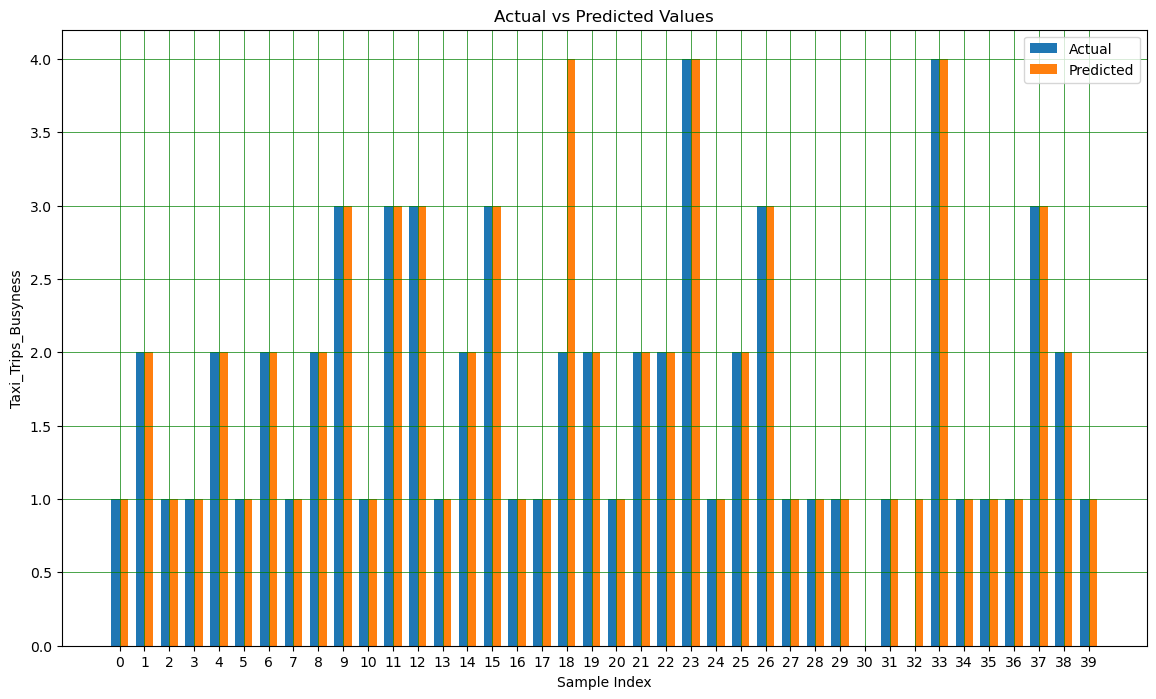

In [26]:
# Sample and reset index
predictions_sample = predictions.sample(40).reset_index(drop=True)

# Create an appropriate range for the x-axis
x = np.arange(len(predictions_sample))

# Define bar width
bar_width = 0.35

# Create subplots
fig, ax = plt.subplots(figsize=(14,8))

# Generate bars for actual and predicted values
rects1 = ax.bar(x - bar_width/2, predictions_sample['Actual'], bar_width, label='Actual')
rects2 = ax.bar(x + bar_width/2, predictions_sample['Predicted'], bar_width, label='Predicted')

# Add some text for labels, title and custom x-axis tick labels
ax.set_xlabel('Sample Index')
ax.set_ylabel('Taxi_Trips_Busyness')
ax.set_title('Actual vs Predicted Values')
ax.set_xticks(x)
ax.legend()

plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

In [27]:
print("Random Forest Classifier Report: \n", classification_report(y_test, predicted_values))

Random Forest Classifier Report: 
               precision    recall  f1-score   support

           0       0.92      0.77      0.84     15519
           1       0.91      0.94      0.92     69964
           2       0.93      0.94      0.94     75343
           3       0.95      0.93      0.94     36128
           4       0.96      0.96      0.96     21976

    accuracy                           0.93    218930
   macro avg       0.93      0.91      0.92    218930
weighted avg       0.93      0.93      0.93    218930



In [28]:
importances = model.feature_importances_

In [29]:
feature_importances = pd.DataFrame({"feature": X.columns, "importance": importances})
feature_importances = feature_importances.sort_values("importance", ascending=False)

In [30]:
print(feature_importances)

       feature  importance
1     latitude    0.369547
0    longitude    0.344364
2         Hour    0.168422
3  Day of Week    0.073632
4        Month    0.044035


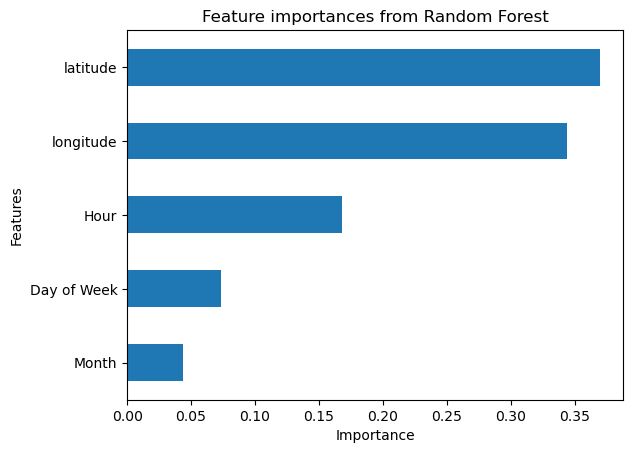

In [31]:
feature_importances.set_index('feature', inplace=True)
feature_importances.sort_values(by="importance", ascending=True, inplace=True)

feature_importances.plot(kind='barh', legend=False)
plt.xlabel('Importance')
plt.ylabel('Features')
plt.title('Feature importances from Random Forest')
plt.show()

***

## Testing Other Models

## Decision Tree Classifier

In [32]:
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)
dt_predictions = dt_model.predict(X_test)
print("Decision Tree Classifier Report: \n", classification_report(y_test, dt_predictions))

Decision Tree Classifier Report: 
               precision    recall  f1-score   support

           0       0.81      0.81      0.81     15519
           1       0.89      0.89      0.89     69964
           2       0.90      0.90      0.90     75343
           3       0.90      0.90      0.90     36128
           4       0.94      0.94      0.94     21976

    accuracy                           0.90    218930
   macro avg       0.89      0.89      0.89    218930
weighted avg       0.90      0.90      0.90    218930



## K-Nearest Neighbors Classifier

In [33]:
knn_model = KNeighborsClassifier()
knn_model.fit(X_train, y_train)
knn_predictions = knn_model.predict(X_test)
print("K-Nearest Neighbors Classifier Report: \n", classification_report(y_test, knn_predictions))

K-Nearest Neighbors Classifier Report: 
               precision    recall  f1-score   support

           0       0.62      0.51      0.56     15519
           1       0.72      0.73      0.73     69964
           2       0.76      0.77      0.76     75343
           3       0.78      0.77      0.78     36128
           4       0.81      0.86      0.84     21976

    accuracy                           0.75    218930
   macro avg       0.74      0.73      0.73    218930
weighted avg       0.75      0.75      0.75    218930



## Incorporate more binning values and change to regressional approach

In [34]:
# Create binning values for 50 noise complaint categories to ensure equal distributions 
weekday_df["Taxi_Trips_Busyness"] = pd.qcut(weekday_df["total_weekday_trips"], q=50, labels=False, duplicates='drop')

In [35]:
test = weekday_df["Taxi_Trips_Busyness"]

In [36]:
test.value_counts()

Taxi_Trips_Busyness
10    26467
29    26190
34    21133
39    21081
6     19313
36    18010
5     17529
37    16498
4     15770
42    15730
2     15678
44    15301
0     15137
18    14868
17    14776
1     14677
46    14579
20    14544
48    14520
13    14318
49    14302
19    14269
25    14158
21    14157
23    14117
14    14006
47    13993
15    13910
43    13881
22    13876
12    13849
24    13821
16    13765
26    13649
45    13539
28    13376
11    13362
3     13322
27    12774
9     12533
40    12217
30    12203
32    11905
31    11671
41    11292
7     11273
8     10842
33    10782
35     9149
38     7652
Name: count, dtype: int64

In [37]:
weekday_df

,longitude,latitude,Hour,Month,Day of Week,cluster_id,total_weekday_trips,Taxi_Trips_Busyness
0,-73.982155,40.767937,17,3,0,50,82.0,45
1,-73.981796,40.768520,17,3,0,50,82.0,45
2,-73.982140,40.768028,17,3,0,50,82.0,45
3,-73.982353,40.768536,17,3,0,50,82.0,45
4,-73.982239,40.768452,17,3,0,50,82.0,45
...,...,...,...,...,...,...,...,...
1018246,-74.002769,40.760681,19,2,1,364,32.0,10
1018247,-73.966393,40.789322,14,4,2,296,30.0,9
1018248,-73.994904,40.765656,6,1,4,245,4.0,0
1018249,-73.984756,40.728607,14,4,1,379,41.0,19


In [38]:
test = weekday_df[weekday_df["Taxi_Trips_Busyness"] == 49]

In [39]:
test

,longitude,latitude,Hour,Month,Day of Week,cluster_id,total_weekday_trips,Taxi_Trips_Busyness
133,-73.994560,40.750526,7,3,4,65,213.0,49
134,-73.993958,40.751446,7,3,4,65,213.0,49
135,-73.993950,40.751354,7,3,4,65,213.0,49
136,-73.993950,40.751297,7,3,4,65,213.0,49
137,-73.994240,40.751011,7,3,4,65,213.0,49
...,...,...,...,...,...,...,...,...
1011145,-73.966553,40.804085,8,5,3,278,140.0,49
1011328,-73.979691,40.743053,20,2,1,470,142.0,49
1011329,-73.980080,40.742447,20,2,1,470,142.0,49
1013173,-73.986122,40.718098,8,6,2,217,128.0,49


In [40]:
test["Hour"].value_counts()

Hour
7     3109
8     1685
6     1643
9     1203
10    1092
21    1085
19     831
22     810
11     702
18     635
12     533
13     314
20     238
23     209
14     110
15     103
Name: count, dtype: int64

In [41]:
weekday_df["Taxi_Trips_Busyness"].nunique()

50

## Merge with Crime Output 

In [43]:
crime_data = pd.read_csv("../Crime_Data_Model_Month.csv")
crime_data

,Unnamed: 0,Latitude,Longitude,Hour,DayOfWeek,Month,Cluster,CrimeCount_binned_regression
0,0,40.737203,-73.983273,3,6,1,20,0.400000
1,1,40.800930,-73.941098,22,4,1,307,0.066667
2,2,40.765024,-73.984836,2,6,1,364,0.200000
3,3,40.828623,-73.943849,20,1,1,33,0.333333
4,4,40.851213,-73.935216,22,5,1,413,0.000000
...,...,...,...,...,...,...,...,...
31240,31240,40.840781,-73.936245,17,2,12,445,0.266667
31241,31241,40.737203,-73.983273,22,3,12,451,0.066667
31242,31242,40.815913,-73.945149,15,0,12,222,0.066667
31243,31243,40.828623,-73.943849,17,4,12,81,0.466667


In [44]:
crime_data = crime_data.drop(columns=["Unnamed: 0"])
crime_data

,Latitude,Longitude,Hour,DayOfWeek,Month,Cluster,CrimeCount_binned_regression
0,40.737203,-73.983273,3,6,1,20,0.400000
1,40.800930,-73.941098,22,4,1,307,0.066667
2,40.765024,-73.984836,2,6,1,364,0.200000
3,40.828623,-73.943849,20,1,1,33,0.333333
4,40.851213,-73.935216,22,5,1,413,0.000000
...,...,...,...,...,...,...,...
31240,40.840781,-73.936245,17,2,12,445,0.266667
31241,40.737203,-73.983273,22,3,12,451,0.066667
31242,40.815913,-73.945149,15,0,12,222,0.066667
31243,40.828623,-73.943849,17,4,12,81,0.466667


In [45]:
crime_data = crime_data.rename(columns={'DayOfWeek': 'Day of Week'})
crime_data

,Latitude,Longitude,Hour,Day of Week,Month,Cluster,CrimeCount_binned_regression
0,40.737203,-73.983273,3,6,1,20,0.400000
1,40.800930,-73.941098,22,4,1,307,0.066667
2,40.765024,-73.984836,2,6,1,364,0.200000
3,40.828623,-73.943849,20,1,1,33,0.333333
4,40.851213,-73.935216,22,5,1,413,0.000000
...,...,...,...,...,...,...,...
31240,40.840781,-73.936245,17,2,12,445,0.266667
31241,40.737203,-73.983273,22,3,12,451,0.066667
31242,40.815913,-73.945149,15,0,12,222,0.066667
31243,40.828623,-73.943849,17,4,12,81,0.466667


In [46]:
crime_data["CrimeCount_binned_regression"].nunique()

8

In [47]:
weekday_df

,longitude,latitude,Hour,Month,Day of Week,cluster_id,total_weekday_trips,Taxi_Trips_Busyness
0,-73.982155,40.767937,17,3,0,50,82.0,45
1,-73.981796,40.768520,17,3,0,50,82.0,45
2,-73.982140,40.768028,17,3,0,50,82.0,45
3,-73.982353,40.768536,17,3,0,50,82.0,45
4,-73.982239,40.768452,17,3,0,50,82.0,45
...,...,...,...,...,...,...,...,...
1018246,-74.002769,40.760681,19,2,1,364,32.0,10
1018247,-73.966393,40.789322,14,4,2,296,30.0,9
1018248,-73.994904,40.765656,6,1,4,245,4.0,0
1018249,-73.984756,40.728607,14,4,1,379,41.0,19


In [48]:
weekday_df['Taxi_Trips_Busyness'].nunique()

50

In [49]:
weekday_df = weekday_df.rename(columns={'cluster_id': 'Cluster'})

In [50]:
merged_df = weekday_df.merge(crime_data, on=['Day of Week', 'Hour', 'Cluster','Month'], how='left')

In [51]:
merged_df

,longitude,latitude,Hour,Month,Day of Week,Cluster,total_weekday_trips,Taxi_Trips_Busyness,Latitude,Longitude,CrimeCount_binned_regression
0,-73.982155,40.767937,17,3,0,50,82.0,45,NaN,NaN,NaN
1,-73.981796,40.768520,17,3,0,50,82.0,45,NaN,NaN,NaN
2,-73.982140,40.768028,17,3,0,50,82.0,45,NaN,NaN,NaN
3,-73.982353,40.768536,17,3,0,50,82.0,45,NaN,NaN,NaN
4,-73.982239,40.768452,17,3,0,50,82.0,45,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
744456,-74.002769,40.760681,19,2,1,364,32.0,10,NaN,NaN,NaN
744457,-73.966393,40.789322,14,4,2,296,30.0,9,NaN,NaN,NaN
744458,-73.994904,40.765656,6,1,4,245,4.0,0,NaN,NaN,NaN
744459,-73.984756,40.728607,14,4,1,379,41.0,19,NaN,NaN,NaN


In [52]:
merged_df = merged_df.drop(columns=["Latitude","Longitude"])
merged_df

,longitude,latitude,Hour,Month,Day of Week,Cluster,total_weekday_trips,Taxi_Trips_Busyness,CrimeCount_binned_regression
0,-73.982155,40.767937,17,3,0,50,82.0,45,NaN
1,-73.981796,40.768520,17,3,0,50,82.0,45,NaN
2,-73.982140,40.768028,17,3,0,50,82.0,45,NaN
3,-73.982353,40.768536,17,3,0,50,82.0,45,NaN
4,-73.982239,40.768452,17,3,0,50,82.0,45,NaN
...,...,...,...,...,...,...,...,...,...
744456,-74.002769,40.760681,19,2,1,364,32.0,10,NaN
744457,-73.966393,40.789322,14,4,2,296,30.0,9,NaN
744458,-73.994904,40.765656,6,1,4,245,4.0,0,NaN
744459,-73.984756,40.728607,14,4,1,379,41.0,19,NaN


In [53]:
merged_df["Taxi_Trips_Busyness_Regression"] = merged_df["Taxi_Trips_Busyness"] / 50

In [54]:
merged_df

,longitude,latitude,Hour,Month,Day of Week,Cluster,total_weekday_trips,Taxi_Trips_Busyness,CrimeCount_binned_regression,Taxi_Trips_Busyness_Regression
0,-73.982155,40.767937,17,3,0,50,82.0,45,NaN,0.90
1,-73.981796,40.768520,17,3,0,50,82.0,45,NaN,0.90
2,-73.982140,40.768028,17,3,0,50,82.0,45,NaN,0.90
3,-73.982353,40.768536,17,3,0,50,82.0,45,NaN,0.90
4,-73.982239,40.768452,17,3,0,50,82.0,45,NaN,0.90
...,...,...,...,...,...,...,...,...,...,...
744456,-74.002769,40.760681,19,2,1,364,32.0,10,NaN,0.20
744457,-73.966393,40.789322,14,4,2,296,30.0,9,NaN,0.18
744458,-73.994904,40.765656,6,1,4,245,4.0,0,NaN,0.00
744459,-73.984756,40.728607,14,4,1,379,41.0,19,NaN,0.38


In [55]:
merged_df['CrimeCount_binned_regression'] = merged_df['CrimeCount_binned_regression'].fillna(0)

In [56]:
def combine_scores(row):
    if row['CrimeCount_binned_regression'] > 0.4:
        return np.mean([row['Taxi_Trips_Busyness_Regression'], row['CrimeCount_binned_regression']])
    else:
        return row['Taxi_Trips_Busyness_Regression']

In [57]:
merged_df['Combined_Score'] = merged_df.apply(combine_scores, axis=1)

In [112]:
merged_df['Combined_Score'] = merged_df[['Taxi_Trips_Busyness_Regression', 'CrimeCount_binned_regression']].max(axis=1)

In [113]:
merged_df['Normalized_Score'] = merged_df['Combined_Score'] / merged_df['Combined_Score'].max()

In [114]:
merged_df

,longitude,latitude,Hour,Month,Day of Week,Cluster,total_weekday_trips,Taxi_Trips_Busyness,CrimeCount_binned_regression,Taxi_Trips_Busyness_Regression,Combined_Score,Normalized_Score
0,-73.982155,40.767937,17,3,0,50,82.0,45,0.0,0.90,0.90,0.918367
1,-73.981796,40.768520,17,3,0,50,82.0,45,0.0,0.90,0.90,0.918367
2,-73.982140,40.768028,17,3,0,50,82.0,45,0.0,0.90,0.90,0.918367
3,-73.982353,40.768536,17,3,0,50,82.0,45,0.0,0.90,0.90,0.918367
4,-73.982239,40.768452,17,3,0,50,82.0,45,0.0,0.90,0.90,0.918367
...,...,...,...,...,...,...,...,...,...,...,...,...
744456,-74.002769,40.760681,19,2,1,364,32.0,10,0.0,0.20,0.20,0.204082
744457,-73.966393,40.789322,14,4,2,296,30.0,9,0.0,0.18,0.18,0.183673
744458,-73.994904,40.765656,6,1,4,245,4.0,0,0.0,0.00,0.00,0.000000
744459,-73.984756,40.728607,14,4,1,379,41.0,19,0.0,0.38,0.38,0.387755


In [115]:
merged_df["Normalized_Score"].value_counts()

Normalized_Score
0.204082    27164
0.591837    26863
0.693878    21589
0.795918    21491
0.122449    19365
0.734694    18521
0.102041    17547
0.755102    16795
0.857143    16200
0.081633    15862
0.040816    15659
0.897959    15492
0.408163    15408
0.000000    15146
0.367347    15078
0.346939    15064
0.938776    14737
0.020408    14658
0.979592    14644
0.387755    14558
0.265306    14514
0.428571    14490
0.469388    14453
0.510204    14427
0.959184    14389
1.000000    14342
0.285714    14252
0.306122    14182
0.244898    14095
0.877551    14084
0.448980    14062
0.489796    14043
0.326531    13980
0.530612    13819
0.571429    13772
0.918367    13627
0.224490    13470
0.061224    13294
0.551020    13063
0.183673    12622
0.816327    12581
0.612245    12505
0.653061    12351
0.632653    11831
0.836735    11636
0.142857    11421
0.163265    10944
0.673469    10899
0.714286     9422
0.775510     7750
0.476190      599
0.136054      592
0.272109      468
0.340136      413
0.068027   

In [116]:
merged_df["Normalized_Score"].nunique()

55

In [117]:
weekday_df = merged_df

In [118]:
weekday_df

,longitude,latitude,Hour,Month,Day of Week,Cluster,total_weekday_trips,Taxi_Trips_Busyness,CrimeCount_binned_regression,Taxi_Trips_Busyness_Regression,Combined_Score,Normalized_Score
0,-73.982155,40.767937,17,3,0,50,82.0,45,0.0,0.90,0.90,0.918367
1,-73.981796,40.768520,17,3,0,50,82.0,45,0.0,0.90,0.90,0.918367
2,-73.982140,40.768028,17,3,0,50,82.0,45,0.0,0.90,0.90,0.918367
3,-73.982353,40.768536,17,3,0,50,82.0,45,0.0,0.90,0.90,0.918367
4,-73.982239,40.768452,17,3,0,50,82.0,45,0.0,0.90,0.90,0.918367
...,...,...,...,...,...,...,...,...,...,...,...,...
744456,-74.002769,40.760681,19,2,1,364,32.0,10,0.0,0.20,0.20,0.204082
744457,-73.966393,40.789322,14,4,2,296,30.0,9,0.0,0.18,0.18,0.183673
744458,-73.994904,40.765656,6,1,4,245,4.0,0,0.0,0.00,0.00,0.000000
744459,-73.984756,40.728607,14,4,1,379,41.0,19,0.0,0.38,0.38,0.387755


In [119]:
weekday_df = weekday_df.drop(columns=['Taxi_Trips_Busyness','CrimeCount_binned_regression','Taxi_Trips_Busyness_Regression','Combined_Score'])

In [120]:
weekday_df

,longitude,latitude,Hour,Month,Day of Week,Cluster,total_weekday_trips,Normalized_Score
0,-73.982155,40.767937,17,3,0,50,82.0,0.918367
1,-73.981796,40.768520,17,3,0,50,82.0,0.918367
2,-73.982140,40.768028,17,3,0,50,82.0,0.918367
3,-73.982353,40.768536,17,3,0,50,82.0,0.918367
4,-73.982239,40.768452,17,3,0,50,82.0,0.918367
...,...,...,...,...,...,...,...,...
744456,-74.002769,40.760681,19,2,1,364,32.0,0.204082
744457,-73.966393,40.789322,14,4,2,296,30.0,0.183673
744458,-73.994904,40.765656,6,1,4,245,4.0,0.000000
744459,-73.984756,40.728607,14,4,1,379,41.0,0.387755


In [121]:
weekday_df = weekday_df.drop_duplicates(subset=["latitude","longitude","Hour","Day of Week","Cluster","Month"], keep='last')

In [122]:
weekday_df

,longitude,latitude,Hour,Month,Day of Week,Cluster,total_weekday_trips,Normalized_Score
0,-73.982155,40.767937,17,3,0,50,82.0,0.918367
1,-73.981796,40.768520,17,3,0,50,82.0,0.918367
2,-73.982140,40.768028,17,3,0,50,82.0,0.918367
3,-73.982353,40.768536,17,3,0,50,82.0,0.918367
4,-73.982239,40.768452,17,3,0,50,82.0,0.918367
...,...,...,...,...,...,...,...,...
744456,-74.002769,40.760681,19,2,1,364,32.0,0.204082
744457,-73.966393,40.789322,14,4,2,296,30.0,0.183673
744458,-73.994904,40.765656,6,1,4,245,4.0,0.000000
744459,-73.984756,40.728607,14,4,1,379,41.0,0.387755


***

## Create the Model for Regression Capabilities

In [123]:
weekday_df

,longitude,latitude,Hour,Month,Day of Week,Cluster,total_weekday_trips,Normalized_Score
0,-73.982155,40.767937,17,3,0,50,82.0,0.918367
1,-73.981796,40.768520,17,3,0,50,82.0,0.918367
2,-73.982140,40.768028,17,3,0,50,82.0,0.918367
3,-73.982353,40.768536,17,3,0,50,82.0,0.918367
4,-73.982239,40.768452,17,3,0,50,82.0,0.918367
...,...,...,...,...,...,...,...,...
744456,-74.002769,40.760681,19,2,1,364,32.0,0.204082
744457,-73.966393,40.789322,14,4,2,296,30.0,0.183673
744458,-73.994904,40.765656,6,1,4,245,4.0,0.000000
744459,-73.984756,40.728607,14,4,1,379,41.0,0.387755


In [124]:
weekday_df["Normalized_Score"]

0         0.918367
1         0.918367
2         0.918367
3         0.918367
4         0.918367
            ...   
744456    0.204082
744457    0.183673
744458    0.000000
744459    0.387755
744460    0.020408
Name: Normalized_Score, Length: 729764, dtype: float64

***

## Model Building and Testing

In [125]:
X = weekday_df[["longitude","latitude","Hour","Day of Week","Month"]]
y = weekday_df["Normalized_Score"]

#### May be beneficial to test the accuracy of other models to train the most optimal solution for our application

In [126]:
from xgboost import XGBRegressor

models = {
    "Ridge": Ridge(),
    "Lasso": Lasso(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest": RandomForestRegressor(),
    "Gradient Boosting": GradientBoostingRegressor(),
    "XGBoost": XGBRegressor()
}

In [127]:
def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    mask = y_true != 0
    return np.mean(np.abs((y_true[mask] - y_pred[mask]) / y_true[mask])) * 100

def mean_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    mask = y_true != 0
    return np.mean((y_true[mask] - y_pred[mask]) / y_true[mask]) * 100

In [128]:
metrics = {
    "Model": [],
    "RMSE": [],
    "R-squared": [],
    "MAE": [],
    "MPE": [],
    "MAPE": [],
    "Training time": []
}

for model_name, model in models.items():
    start = time.time()
    
    model.fit(X_train, y_train)
    
    end = time.time()
    
    model_time = end - start
    
    y_pred = model.predict(X_test)
    
    model_rmse = sqrt(mean_squared_error(y_test, y_pred))
    model_r2 = r2_score(y_test, y_pred)
    model_mae = mean_absolute_error(y_test, y_pred)
    model_mpe = mean_percentage_error(y_test, y_pred)
    model_mape = mean_absolute_percentage_error(y_test, y_pred)
    
    metrics["Model"].append(model_name)
    metrics["RMSE"].append(model_rmse)
    metrics["R-squared"].append(model_r2)
    metrics["MAE"].append(model_mae)
    metrics["MPE"].append(model_mpe)
    metrics["MAPE"].append(model_mape)
    metrics["Training time"].append(model_time)
    
    print(f"{model_name}:\n- RMSE: {model_rmse}\n- R-squared: {model_r2}\n- MAE: {model_mae}\n- MPE: {model_mpe}\n- MAPE: {model_mape}\n- Training time: {model_time}\n")



Ridge:
- RMSE: 0.2873337138631166
- R-squared: 0.054923950204066374
- MAE: 0.24728128215992004
- MPE: -115.20825534539132
- MAPE: 146.38279932737245
- Training time: 0.3178849220275879

Lasso:
- RMSE: 0.2955653326149527
- R-squared: -1.3168974695165758e-06
- MAE: 0.25666785121538904
- MPE: -124.96910074297323
- MAPE: 157.11554713484412
- Training time: 0.0408022403717041

Decision Tree:
- RMSE: 0.0923215431542001
- R-squared: 0.9024337315701526
- MAE: 0.028549354556454753
- MPE: -7.5343168570520564
- MAPE: 14.958773658462135
- Training time: 2.5076019763946533

Random Forest:
- RMSE: 0.06720290583873428
- R-squared: 0.948302482444562
- MAE: 0.032921514059297254
- MPE: -10.427242858145133
- MAPE: 17.56798116065713
- Training time: 168.8961317539215

Gradient Boosting:
- RMSE: 0.23752721609172844
- R-squared: 0.3541668365584435
- MAE: 0.20085848901830042
- MPE: -82.28262492891804
- MAPE: 109.32206853998096
- Training time: 44.22302198410034

XGBoost:
- RMSE: 0.15854381155428807
- R-squar

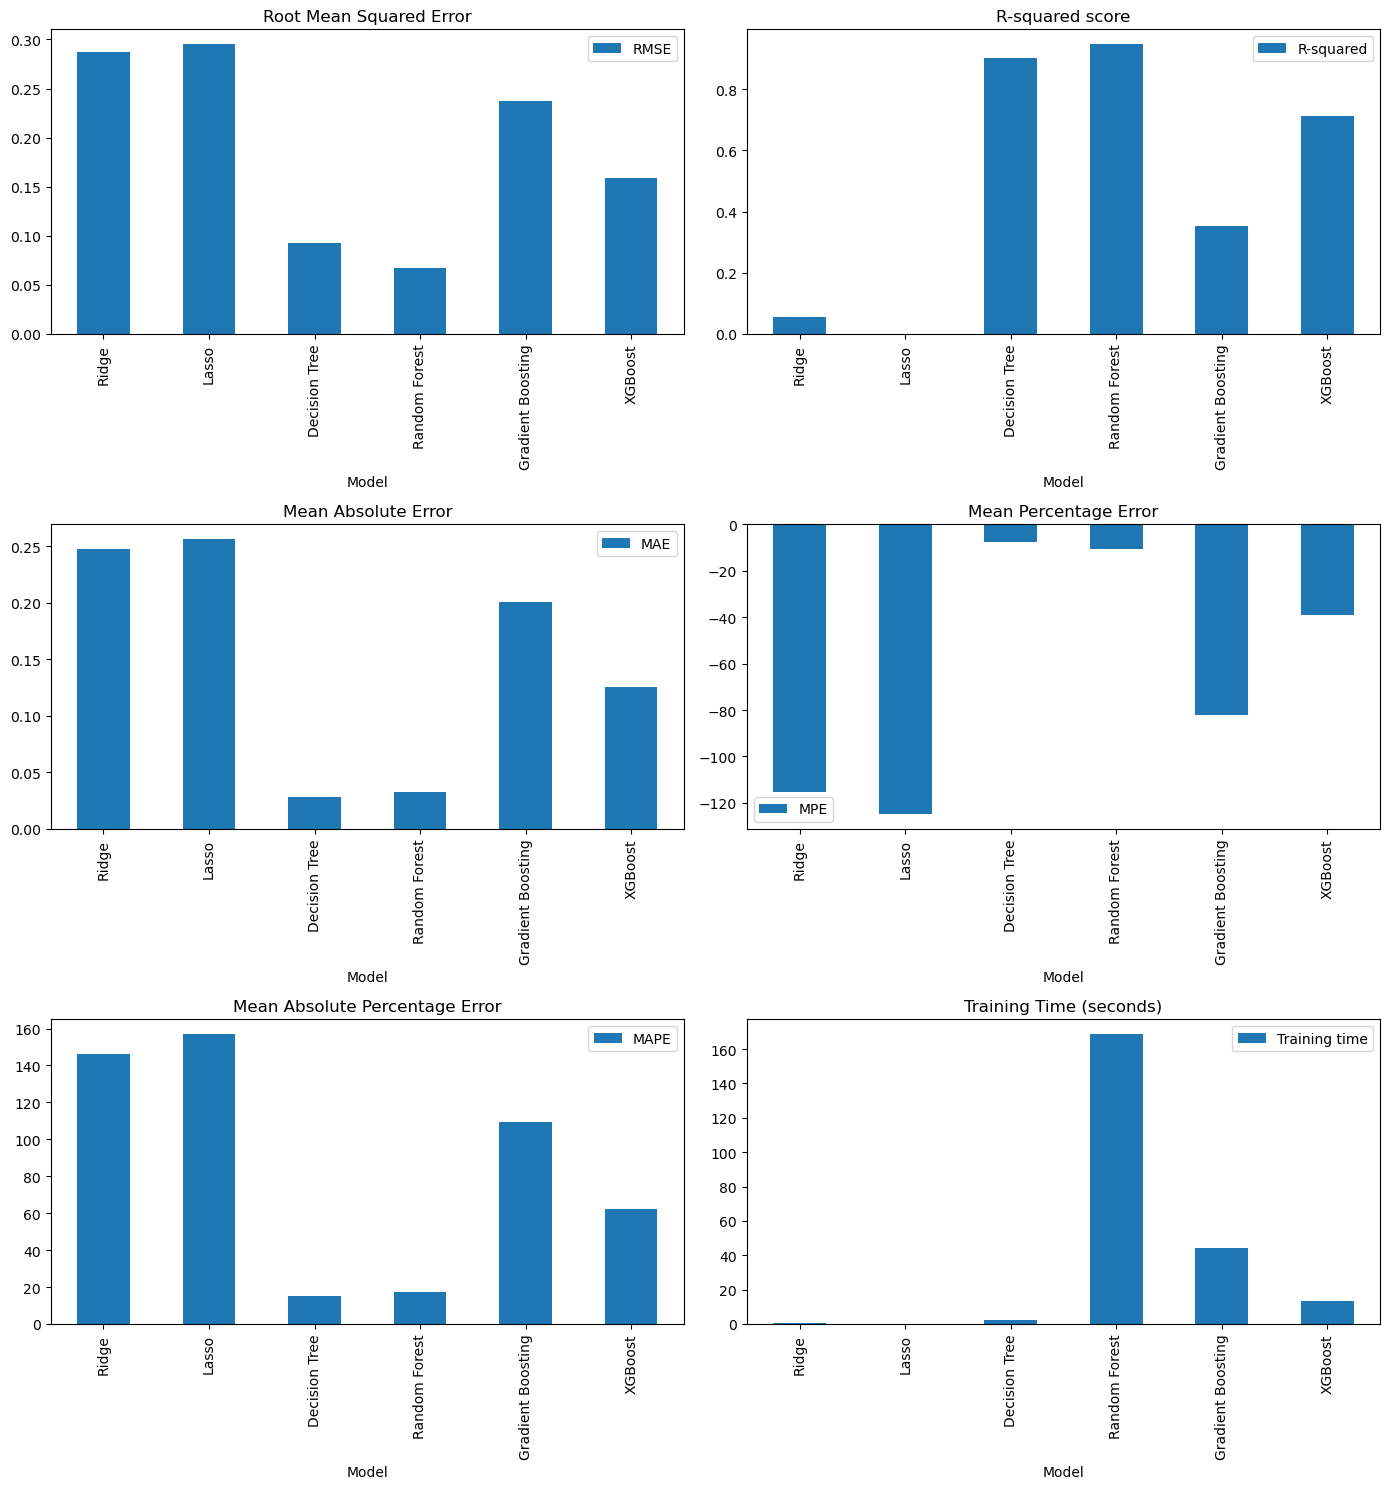

In [129]:
metrics_df = pd.DataFrame(metrics)

fig, ax = plt.subplots(3, 2, figsize=(14, 15))

metrics_df.plot(x="Model", y="RMSE", kind="bar", ax=ax[0, 0])
ax[0, 0].set_title("Root Mean Squared Error")

metrics_df.plot(x="Model", y="R-squared", kind="bar", ax=ax[0, 1])
ax[0, 1].set_title("R-squared score")

metrics_df.plot(x="Model", y="MAE", kind="bar", ax=ax[1, 0])
ax[1, 0].set_title("Mean Absolute Error")

metrics_df.plot(x="Model", y="MPE", kind="bar", ax=ax[1, 1])
ax[1, 1].set_title("Mean Percentage Error")

metrics_df.plot(x="Model", y="MAPE", kind="bar", ax=ax[2, 0])
ax[2, 0].set_title("Mean Absolute Percentage Error")

metrics_df.plot(x="Model", y="Training time", kind="bar", ax=ax[2, 1])
ax[2, 1].set_title("Training Time (seconds)")

plt.tight_layout()
plt.show()

#### Evident to see from the above metrics suggest that the Random Forest Regressor, as well as the Classifier model previously, is the most accurate model for our approach to modelling

#### While saying this however, there is a huge contrast between the training time of the Random Forest Regressor and the Decision Tree Regressor - With this being said, I have decided to use the Decision Tree Regressor to enhance the performance based off runtime
* Below is the approach and further analysis of the model to ensure we have made the correct choice

In [130]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [131]:
dt_model = DecisionTreeRegressor(random_state=36)

In [132]:
dt_model.fit(X_train, y_train)

DecisionTreeRegressor(random_state=36)

In [133]:
y_pred = dt_model.predict(X_test)

In [134]:
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

In [135]:
print("Decision Tree - Root Mean Squared Error (RMSE):", rmse)
print("Decision Tree - R-squared score:", r2)
print("Decision Tree - Mean absolute error:", mae)

Decision Tree - Root Mean Squared Error (RMSE): 0.09247855345926202
Decision Tree - R-squared score: 0.9021015894632816
Decision Tree - Mean absolute error: 0.028630081317296736


In [136]:
start_time = time.time()

dt_model = DecisionTreeRegressor(random_state=36)
dt_model = dt_model.fit(X_train, y_train)

end_time = time.time()

dt_time = end_time - start_time
print(f"Time taken to train Random Forest model : {dt_time} seconds")

Time taken to train Random Forest model : 2.44804310798645 seconds


In [137]:
predictions = dt_model.predict(X_test)

In [138]:
df1 = pd.DataFrame({'Actual': y_test.values, 'Predicted': predictions})
print(df1)

          Actual  Predicted
0       0.000000   0.000000
1       0.285714   0.224490
2       0.938776   0.938776
3       0.428571   0.428571
4       0.040816   0.040816
...          ...        ...
145948  0.061224   0.061224
145949  0.122449   0.122449
145950  0.551020   0.551020
145951  0.959184   0.959184
145952  0.653061   0.653061

[145953 rows x 2 columns]


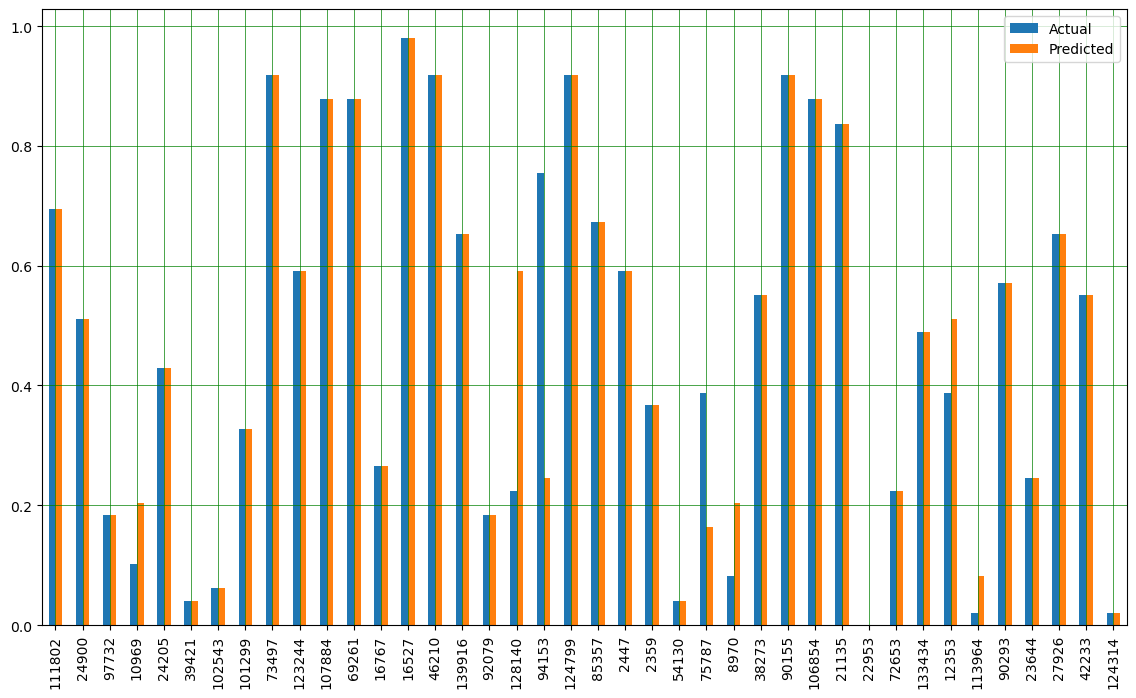

In [139]:
df1.sample(40).plot(kind='bar',figsize=(14,8))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

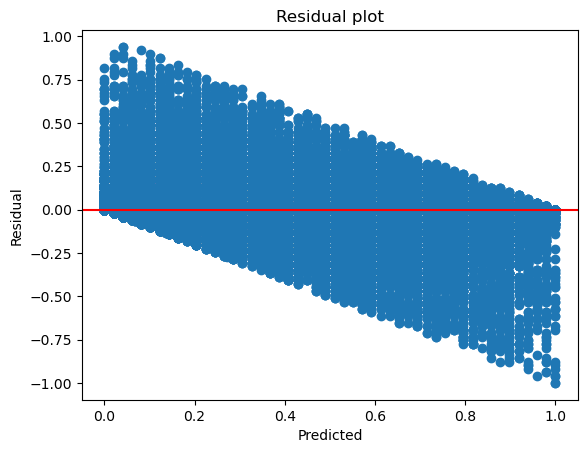

In [140]:
y_pred = dt_model.predict(X_test)

residuals = y_test - y_pred

plt.scatter(y_pred, residuals)
plt.xlabel('Predicted')
plt.ylabel('Residual')
plt.axhline(y=0, color='r', linestyle='-')
plt.title('Residual plot')
plt.show()

In [141]:
importances = list(dt_model.feature_importances_)

feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(X.columns, importances)]

In [142]:
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)

for pair in feature_importances:
    print('Variable: {:20} Importance: {}'.format(*pair))

Variable: longitude            Importance: 0.34
Variable: latitude             Importance: 0.34
Variable: Hour                 Importance: 0.24
Variable: Day of Week          Importance: 0.07
Variable: Month                Importance: 0.0


In [143]:
perm = PermutationImportance(dt_model, random_state=1).fit(X_test, y_test)
eli5.show_weights(perm, feature_names = X_test.columns.tolist())

Weight,Feature
1.7633 ± 0.0045,latitude
1.6743 ± 0.0117,longitude
1.0889 ± 0.0055,Hour
0.2402 ± 0.0032,Day of Week
0.0012 ± 0.0006,Month


### Run a basic test

In [144]:
X_test = [[-73.999474, 40.734135, 11, 2, 4]] # replace this with actual test data
y_test = [0.7] # replace this with actual test data

In [145]:
y_pred = dt_model.predict(X_test)

/Users/conormcelduff/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


In [146]:
print("Predicted output:", y_pred)

Predicted output: [0.59183673]


## Final test against the more accurate Random Forest Regressor

In [147]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [148]:
rf_model = RandomForestRegressor(n_estimators = 5, random_state = 42)

In [149]:
rf_model.fit(X_train, y_train)

RandomForestRegressor(n_estimators=5, random_state=42)

In [150]:
y_pred = rf_model.predict(X_test)

In [151]:
predictions = rf_model.predict(X_test)

In [152]:
df1 = pd.DataFrame({'Actual': y_test.values, 'Predicted': predictions})
print(df1)

          Actual  Predicted
0       0.000000   0.089796
1       0.285714   0.338776
2       0.938776   0.938776
3       0.428571   0.428571
4       0.040816   0.032653
...          ...        ...
145948  0.061224   0.134694
145949  0.122449   0.220408
145950  0.551020   0.551020
145951  0.959184   0.959184
145952  0.653061   0.653061

[145953 rows x 2 columns]


In [153]:
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

In [154]:
print("Random Forest - Root Mean Squared Error (RMSE):", rmse)
print("Random Forest - R-squared score:", r2)
print("Random Forest - Mean absolute error:", mae)

Random Forest - Root Mean Squared Error (RMSE): 0.07641082886457012
Random Forest - R-squared score: 0.9331650840446112
Random Forest - Mean absolute error: 0.03587289375747698


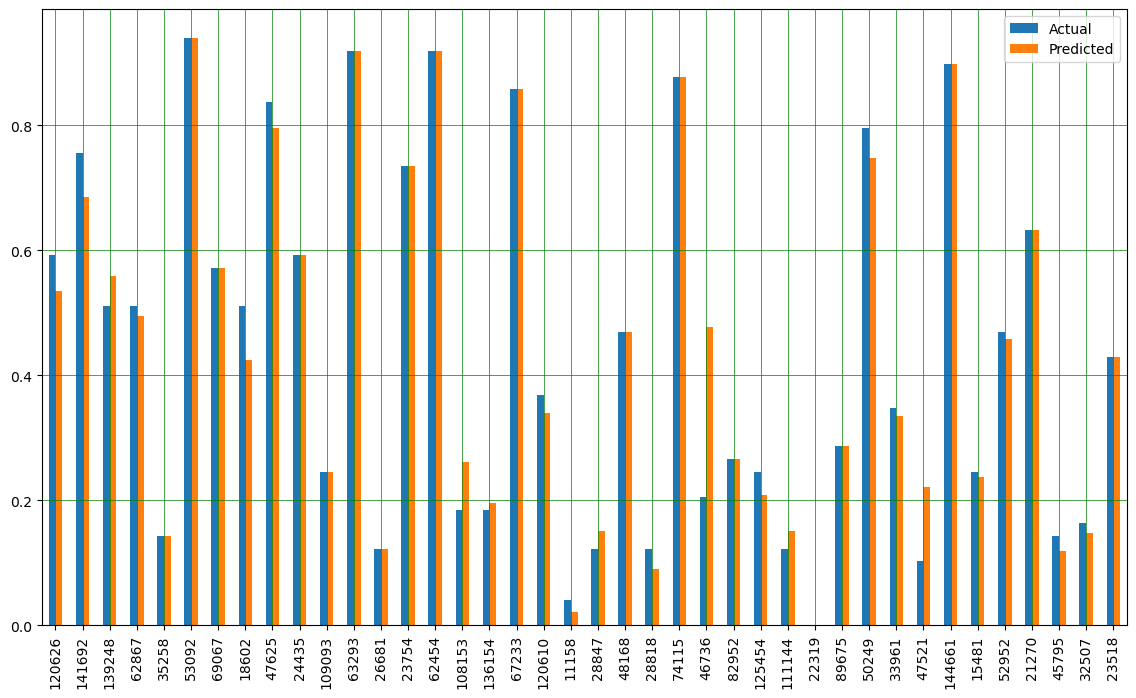

In [155]:
df1.sample(40).plot(kind='bar',figsize=(14,8))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

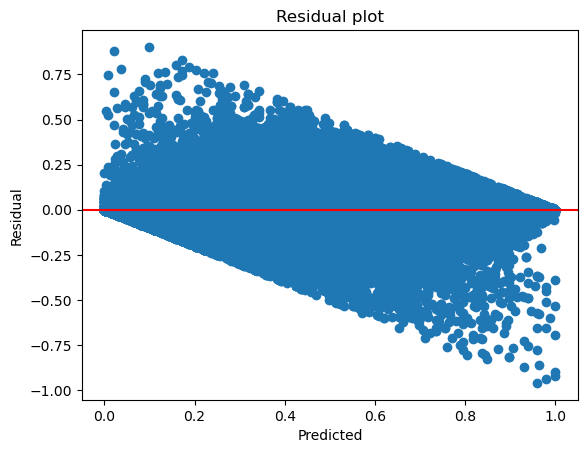

In [156]:
y_pred = rf_model.predict(X_test)

residuals = y_test - y_pred

plt.scatter(y_pred, residuals)
plt.xlabel('Predicted')
plt.ylabel('Residual')
plt.axhline(y=0, color='r', linestyle='-')
plt.title('Residual plot')
plt.show()

In [157]:
importances = list(rf_model.feature_importances_)

feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(X.columns, importances)]

In [158]:
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)

for pair in feature_importances:
    print('Variable: {:20} Importance: {}'.format(*pair))

Variable: latitude             Importance: 0.35
Variable: longitude            Importance: 0.34
Variable: Hour                 Importance: 0.23
Variable: Day of Week          Importance: 0.07
Variable: Month                Importance: 0.01


In [159]:
perm = PermutationImportance(rf_model, random_state=1).fit(X_test, y_test)
eli5.show_weights( perm, feature_names = X_test.columns.tolist())

Weight,Feature
1.6074 ± 0.0036,latitude
1.5217 ± 0.0076,longitude
1.0464 ± 0.0044,Hour
0.2180 ± 0.0020,Day of Week
0.0008 ± 0.0002,Month


## Create pkl file with RF model

In [160]:
pkl_filename = "rf_weekday_model_noweather_crime_month.pkl"
with open(pkl_filename, 'wb') as file:
    pickle.dump(rf_model, file)

## Create a CSV file for backend rendering

In [161]:
weekday_df

,longitude,latitude,Hour,Month,Day of Week,Cluster,total_weekday_trips,Normalized_Score
0,-73.982155,40.767937,17,3,0,50,82.0,0.918367
1,-73.981796,40.768520,17,3,0,50,82.0,0.918367
2,-73.982140,40.768028,17,3,0,50,82.0,0.918367
3,-73.982353,40.768536,17,3,0,50,82.0,0.918367
4,-73.982239,40.768452,17,3,0,50,82.0,0.918367
...,...,...,...,...,...,...,...,...
744456,-74.002769,40.760681,19,2,1,364,32.0,0.204082
744457,-73.966393,40.789322,14,4,2,296,30.0,0.183673
744458,-73.994904,40.765656,6,1,4,245,4.0,0.000000
744459,-73.984756,40.728607,14,4,1,379,41.0,0.387755


In [162]:
weekday_df.to_csv("Final_Weekday_Model_Data_NoWeather_Crime_Month.csv")